 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [55]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt
import datetime as dt
from pathlib import Path
import seaborn as sns
import os

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [56]:
# Reading whale returns
#%% set up the directory
os.chdir("/home/oodaye/Fintech/class_repo/python-homework-repo/python-homework")

#%% ingest the data 
basedir = '/home/oodaye/Fintech/class_repo/python-homework-repo/python-homework/HW4_Portfolio_Analysis'

aapl_pth = Path(basedir + "/Resources/aapl_historical.csv")
algo_pth = Path(basedir + "/Resources/algo_returns.csv")
cost_pth = Path(basedir + "/Resources/cost_historical.csv")
goog_pth = Path(basedir + "/Resources/goog_historical.csv")
sp500_pth = Path(basedir + "/Resources/sp500_history.csv")
whale_pth = Path(basedir + "/Resources/whale_returns.csv")

aapl_df = pd.read_csv(aapl_pth, index_col=("Trade DATE"))
cost_df = pd.read_csv(cost_pth, index_col=("Trade DATE"))
goog_df = pd.read_csv(goog_pth, index_col=("Trade DATE"))

## handle these data separately to align the date format for later concatenation
sp500_df = pd.read_csv(sp500_pth)
sp500_df["Date"] = pd.to_datetime(sp500_df["Date"])
sp500_df = sp500_df.set_index("Date")
sp500_df = sp500_df.rename(columns = {'Close':'SP500'})

algo_df = pd.read_csv(algo_pth)
algo_df["Date"] = pd.to_datetime(algo_df["Date"])
algo_df = algo_df.set_index("Date")

whale_df = pd.read_csv(whale_pth)
whale_df["Date"] = pd.to_datetime(whale_df["Date"])
whale_df = whale_df.set_index("Date")

In [57]:
# Count nulls
#%% clean the data -- 
## Count nulls 
aapl_nulls = aapl_df.isnull().sum()
algo_nulls = algo_df.isnull().sum()
cost_nulls = cost_df.isnull().sum()
goog_nulls = goog_df.isnull().sum()
sp500_nulls = sp500_df.isnull().sum()
whale_nulls = whale_df.isnull().sum()

print(f"Nulls: AAPL={aapl_nulls}, Algo={algo_nulls}, Cost={cost_nulls}, GOOG={goog_nulls}, SP500={sp500_nulls}, Whale={whale_nulls}")

Nulls: AAPL=Symbol    0
NOCP      0
dtype: int64, Algo=Algo 1    0
Algo 2    6
dtype: int64, Cost=Symbol    0
NOCP      0
dtype: int64, GOOG=Symbol    0
NOCP      0
dtype: int64, SP500=SP500    0
dtype: int64, Whale=SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [58]:
#%% convert the data type in SP500 to numeric from string 
## source: https://pbpython.com/currency-cleanup.html

sp500_df['SP500'] = sp500_df['SP500'].replace({'\$': '', ',': ''}, regex=True).astype(float)
sp500_df['SP500'] = sp500_df['SP500'].pct_change()     ## compute the returns for SP500 

sp500_df.head()

,SP500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [59]:
# Drop nulls
#%% Drop the nulls 
aapl = aapl_df.dropna()
algo = algo_df.dropna()
cost = cost_df.dropna()
goog = goog_df.dropna()
sp500 = sp500_df.dropna()
whale = whale_df.dropna()

sp500.head() 

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [60]:
# Reading algorithmic returns
# completed in the prior cells 

In [61]:
# Count nulls
# completed in the prior cells 

In [62]:
# Drop nulls
# completed in the prior cells 

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [63]:
# Reading S&P 500 Closing Prices
# completed in the prior cells 

In [64]:
# Check Data Types
# completed in the prior cells 

In [65]:
# Fix Data Types
# completed in the prior cells 

In [66]:
# Calculate Daily Returns
# completed in the prior cells 

In [67]:
# Drop nulls
# completed in the prior cells 

In [68]:
# Rename `Close` Column to be specific to this portfolio.
# completed in the prior cells 
print(sp500.columns)

Index(['SP500'], dtype='object')


## Combine Whale, Algorithmic, and S&P 500 Returns

In [69]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
#%% Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

jnd_ret = pd.concat([whale, algo, sp500], axis="columns", join = "inner")
jnd_ret = jnd_ret.sort_index(ascending=False)

### jnd_ret are the daily returns -- only the SP500 dataframe needed to be changed 


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

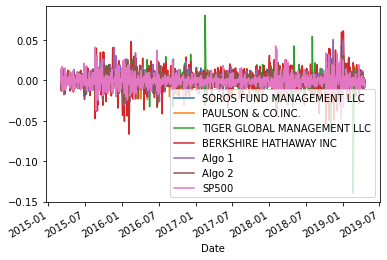

In [70]:
# Plot daily returns of all portfolios
jnd_ret.plot()

<AxesSubplot:title={'center':'SP500'}, xlabel='Date', ylabel='Returns'>

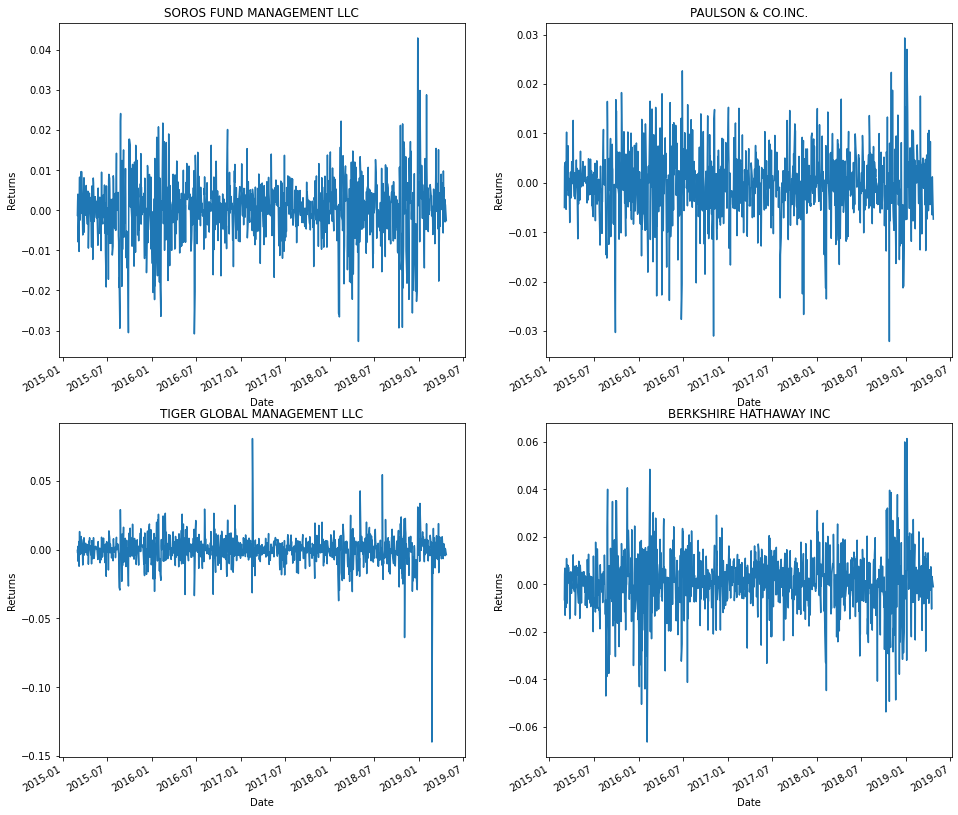

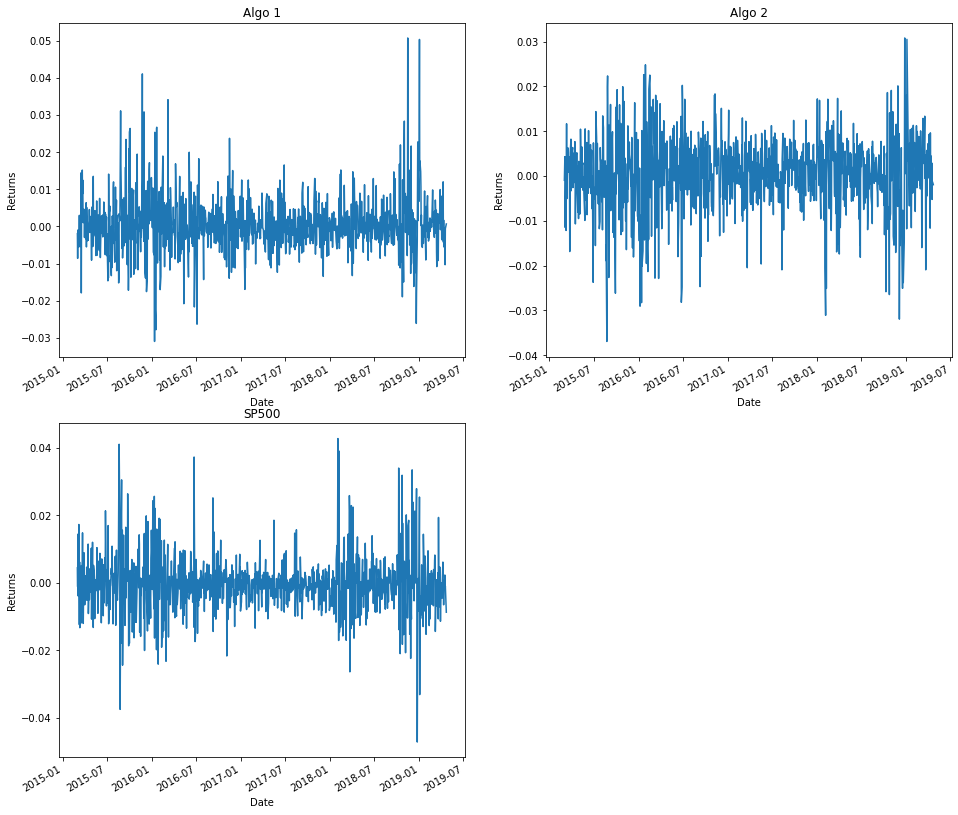

In [71]:
#%% use the subplot feature 
## use the matplotlib subplots 


fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
jnd_ret[jnd_ret.columns[0]].plot(xlabel="Date", ylabel="Returns", title=jnd_ret.columns[0].strip())

fig.add_subplot(2,2,2) 
jnd_ret[jnd_ret.columns[1]].plot(xlabel="Date", ylabel="Returns", title=jnd_ret.columns[1].strip())

fig.add_subplot(2,2,3) 
jnd_ret[jnd_ret.columns[2]].plot(xlabel="Date", ylabel="Returns", title=jnd_ret.columns[2].strip())

fig.add_subplot(2,2,4) 
jnd_ret[jnd_ret.columns[3]].plot(xlabel="Date", ylabel="Returns", title=jnd_ret.columns[3].strip())


fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
jnd_ret[jnd_ret.columns[4]].plot(xlabel="Date", ylabel="Returns", title=jnd_ret.columns[4].strip())

fig.add_subplot(2,2,2) 
jnd_ret[jnd_ret.columns[5]].plot(xlabel="Date", ylabel="Returns", title=jnd_ret.columns[5].strip())

fig.add_subplot(2,2,3) 
jnd_ret[jnd_ret.columns[6]].plot(xlabel="Date", ylabel="Returns", title=jnd_ret.columns[6].strip())


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'SP500'}, xlabel='Date', ylabel='Cumulative Returns'>

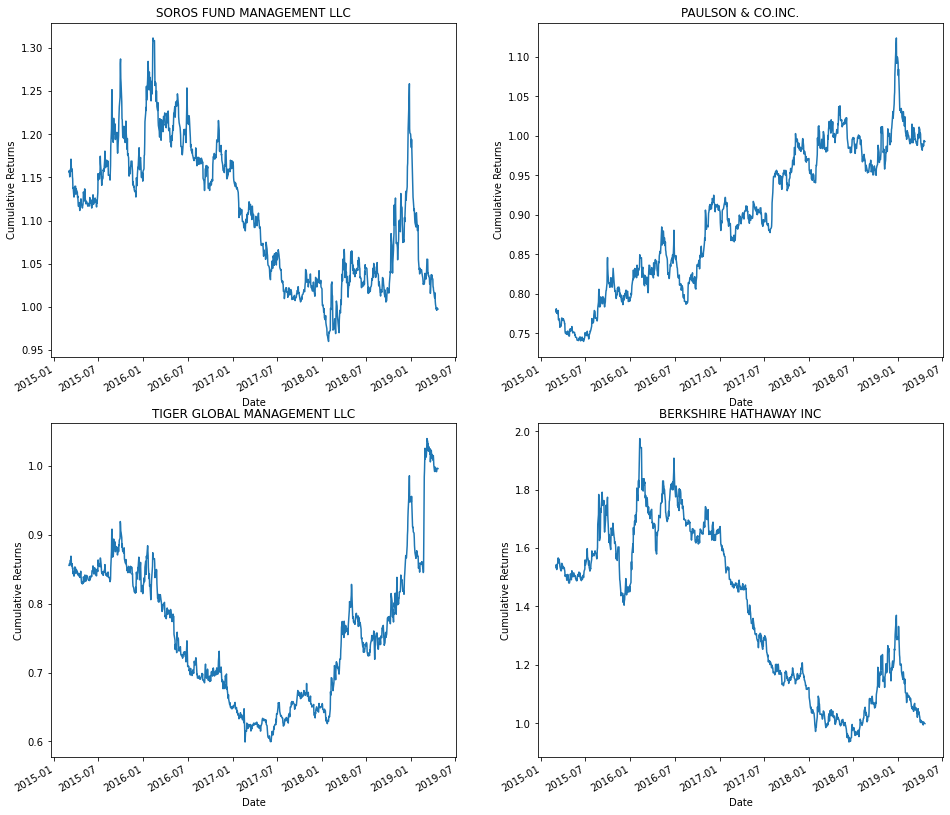

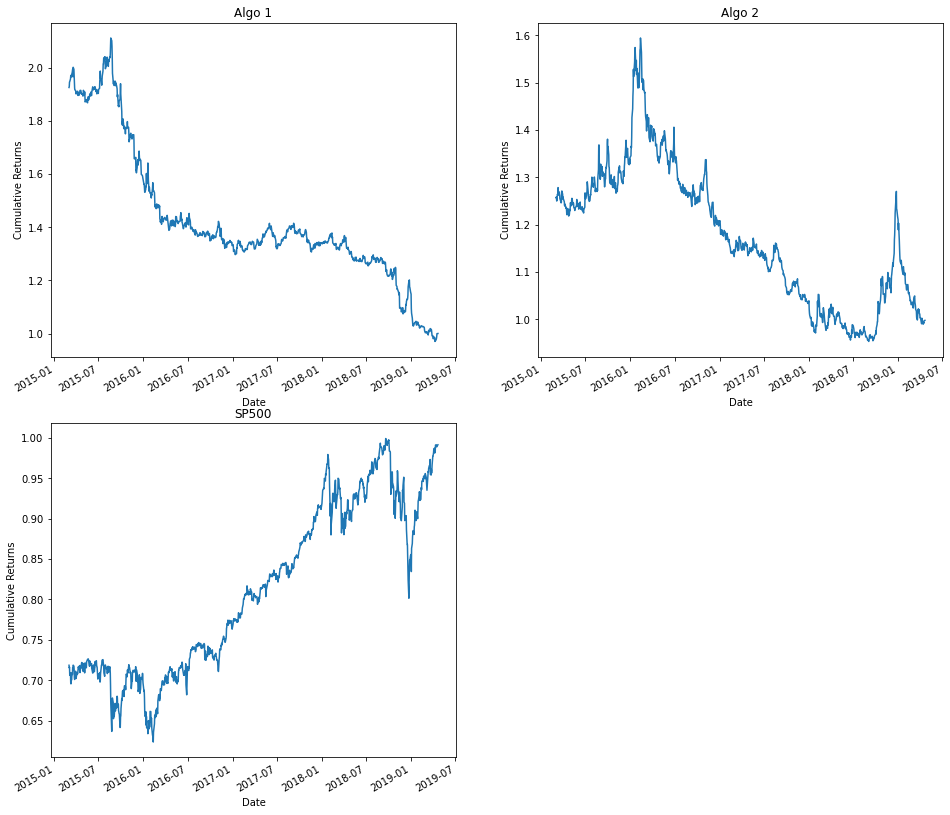

In [72]:
# Calculate cumulative returns of all portfolios
#%% Calculate the cumulative returns using the 'cumprod()' function
cum_ret = (1 + jnd_ret).cumprod()       ### compute the cumulative returns 

# Plot cumulative returns
#%% plot the figures 

fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
cum_ret[cum_ret.columns[0]].plot(xlabel="Date", ylabel="Cumulative Returns", title=cum_ret.columns[0].strip())

fig.add_subplot(2,2,2) 
cum_ret[cum_ret.columns[1]].plot(xlabel="Date", ylabel="Cumulative Returns", title=cum_ret.columns[1].strip())

fig.add_subplot(2,2,3) 
cum_ret[cum_ret.columns[2]].plot(xlabel="Date", ylabel="Cumulative Returns", title=cum_ret.columns[2].strip())

fig.add_subplot(2,2,4) 
cum_ret[cum_ret.columns[3]].plot(xlabel="Date", ylabel="Cumulative Returns", title=cum_ret.columns[3].strip())


fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
cum_ret[cum_ret.columns[4]].plot(xlabel="Date", ylabel="Cumulative Returns", title=cum_ret.columns[4].strip())

fig.add_subplot(2,2,2) 
cum_ret[cum_ret.columns[5]].plot(xlabel="Date", ylabel="Cumulative Returns", title=cum_ret.columns[5].strip())

fig.add_subplot(2,2,3) 
cum_ret[cum_ret.columns[6]].plot(xlabel="Date", ylabel="Cumulative Returns", title=cum_ret.columns[6].strip())



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


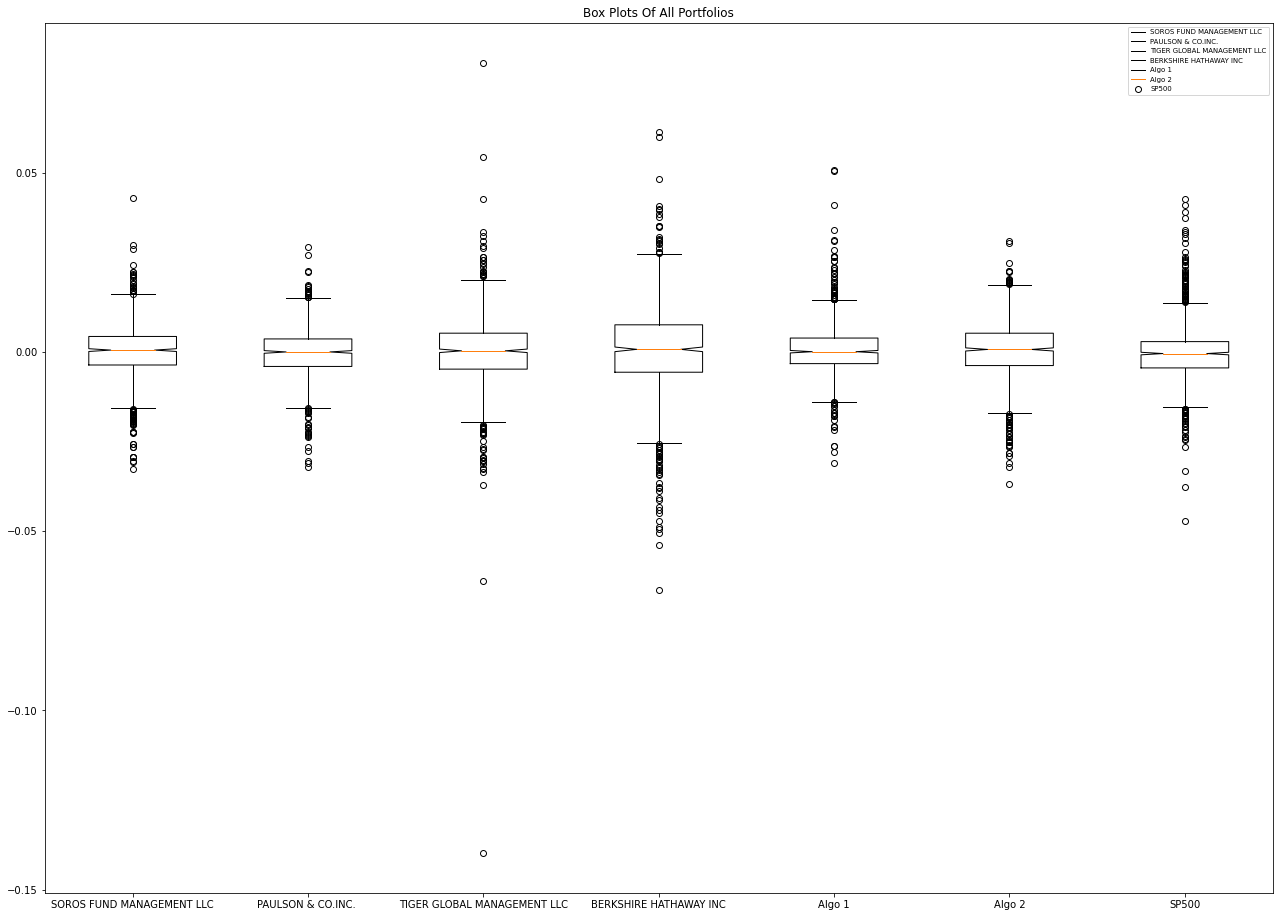

In [73]:
# Box plot to visually show risk
#%% create a boxplot for each portfolio


fig1, ax1 = plt.subplots(figsize=(22,16))
ax1.boxplot(jnd_ret, notch=True, labels = [cum_ret.columns[0],
                                            cum_ret.columns[1],
                                            cum_ret.columns[2],
                                            cum_ret.columns[3],
                                            cum_ret.columns[4],
                                            cum_ret.columns[5],
                                            cum_ret.columns[6]
                                            ])

ax1.set_title('Box Plots Of All Portfolios')

ax1.legend([cum_ret.columns[0],
                                            cum_ret.columns[1],
                                            cum_ret.columns[2],
                                            cum_ret.columns[3],
                                            cum_ret.columns[4],
                                            cum_ret.columns[5],
                                            cum_ret.columns[6]
                                            ], fontsize='x-small')
plt.show()

### Calculate Standard Deviations

In [74]:
# Calculate the daily standard deviations of all portfolios


std_ret_yr = jnd_ret.std().sort_values(ascending=False) * np.sqrt(252) 
print(f"Ranked Annual Standard Deviation Of Returns: \n\n{std_ret_yr}")


std_ret_dy = jnd_ret.std().sort_values(ascending=False)  
print(f"Ranked Daily Standard Deviation Of Returns: \n\n{std_ret_dy}")



Ranked Annual Standard Deviation Of Returns: 

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500                          0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64
Ranked Daily Standard Deviation Of Returns: 

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500                          0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [75]:
# Calculate  the daily standard deviation of S&P 500
## shown in the cell above 
# Determine which portfolios are riskier than the S&P 500

print(f"Standard deviation of the SP500 yearly --> {std_ret_yr['SP500']}")

more_risky = std_ret_yr[std_ret_yr>std_ret_yr['SP500']]

print(f"Portfolios riskier than the SP500 (yearly) are: \n\n{more_risky} \n")

print(f"Standard deviation of the SP500 daily --> {std_ret_dy['SP500']}")

more_risky_dy = std_ret_dy[std_ret_dy>std_ret_dy['SP500']]

print(f"Portfolios riskier than the SP500 (daily) are: \n\n{more_risky_dy} \n")



Standard deviation of the SP500 yearly --> 0.1363126488377286
Portfolios riskier than the SP500 (yearly) are: 

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
dtype: float64 

Standard deviation of the SP500 daily --> 0.00858688974707399
Portfolios riskier than the SP500 (daily) are: 

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
dtype: float64 



### Calculate the Annualized Standard Deviation

In [76]:
# Calculate the annualized standard deviation (252 trading days)
# completed above 

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'SP500'}, xlabel='Date', ylabel='Roling Standard Deviation -- 21 Days'>

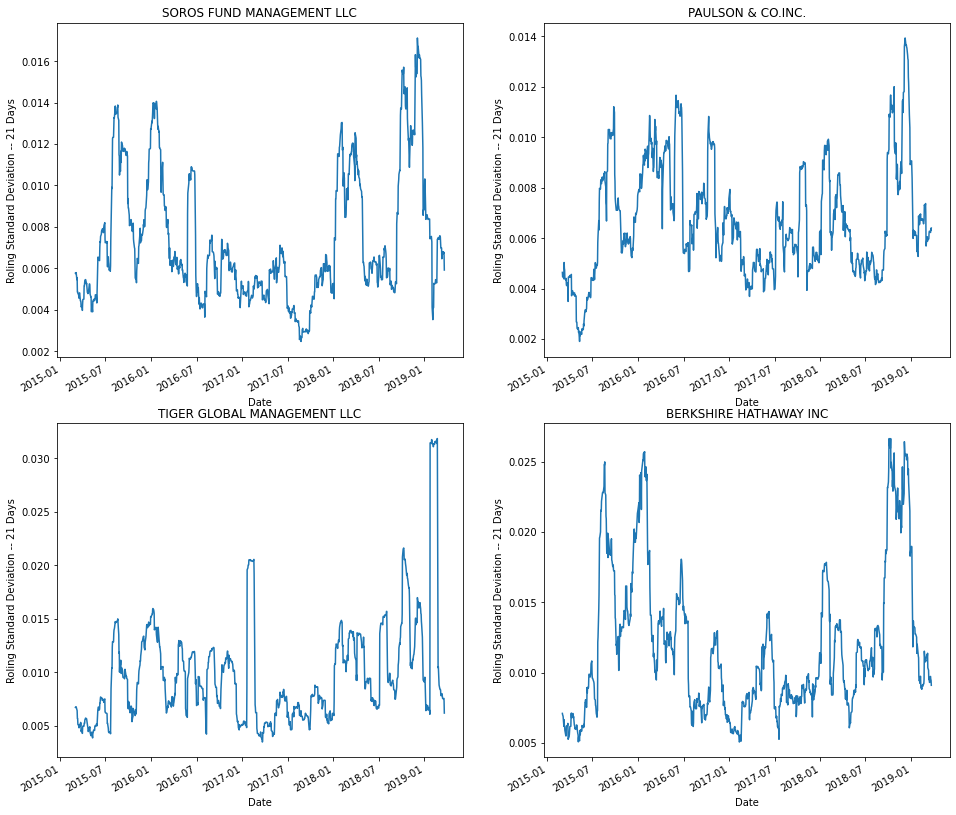

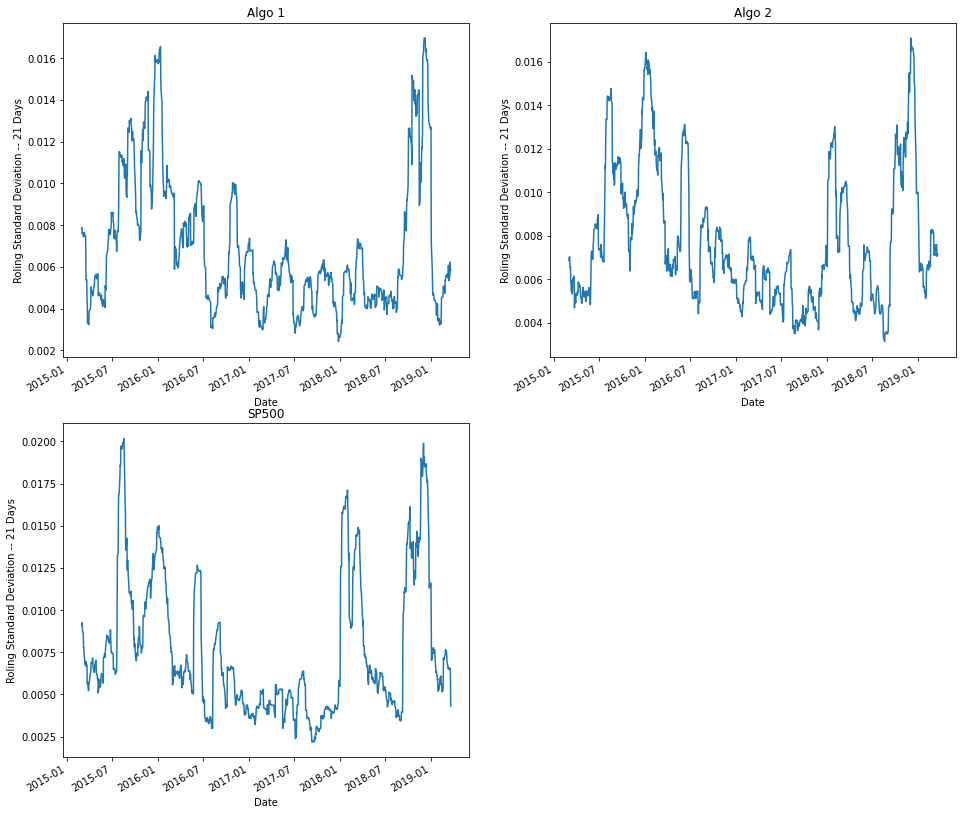

In [77]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
#%% compute the rolling std dev of all the portfolios

roll_std = jnd_ret.rolling(window=21).std()

#%% plot the figures 

fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
roll_std[roll_std.columns[0]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=roll_std.columns[0].strip())

fig.add_subplot(2,2,2) 
roll_std[roll_std.columns[1]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=roll_std.columns[1].strip())

fig.add_subplot(2,2,3) 
roll_std[roll_std.columns[2]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=roll_std.columns[2].strip())

fig.add_subplot(2,2,4) 
roll_std[roll_std.columns[3]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=roll_std.columns[3].strip())


fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
roll_std[roll_std.columns[4]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=roll_std.columns[4].strip())

fig.add_subplot(2,2,2) 
roll_std[roll_std.columns[5]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=roll_std.columns[5].strip())

fig.add_subplot(2,2,3) 
roll_std[roll_std.columns[6]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=roll_std.columns[6].strip())


### Calculate and plot the correlation

<AxesSubplot:>

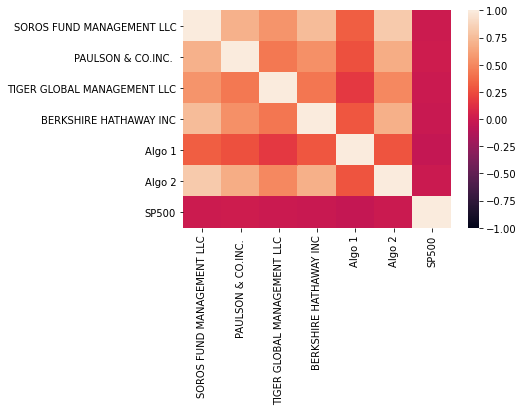

In [78]:
# Calculate the correlation
corr_ret = jnd_ret.corr()

# Display de correlation matrix
#%% plot the correlation matrix

sns.heatmap(corr_ret, vmin=-1, vmax =1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

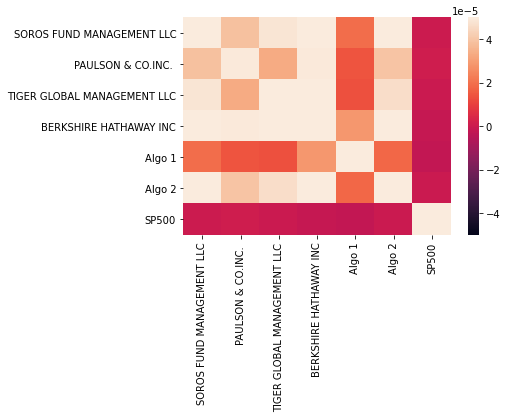

In [79]:
# Calculate variance of a single portfolio
var_sp500 = jnd_ret['SP500'].var() 

## covariance between all portfolios
cov_jnd = jnd_ret.cov()

sns.heatmap(cov_jnd, vmin=-0.00005, vmax = 0.00005, label="Correlation Matrix")

# Calculate covariance of a single portfolio
cov_soros = jnd_ret['SOROS FUND MANAGEMENT LLC'].cov(jnd_ret['SOROS FUND MANAGEMENT LLC'])

# Calculate variance of S&P 500
var_sp500

# Computing beta

## compute the covariance between a portfolio and the SP500 

cov1 = jnd_ret['SOROS FUND MANAGEMENT LLC'].cov(jnd_ret['SP500'])

beta1 = cov1 / var_sp500


# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'SP500'}, xlabel='Date', ylabel='Exponentially Weighted Mean 21 Day Half-Life'>

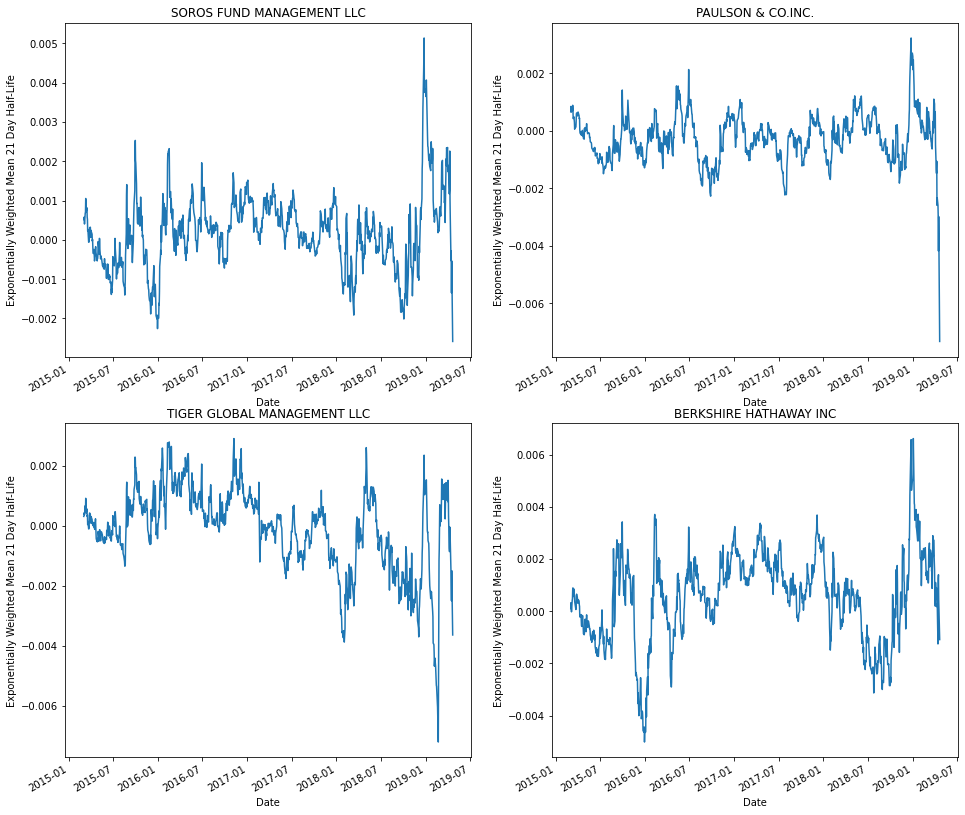

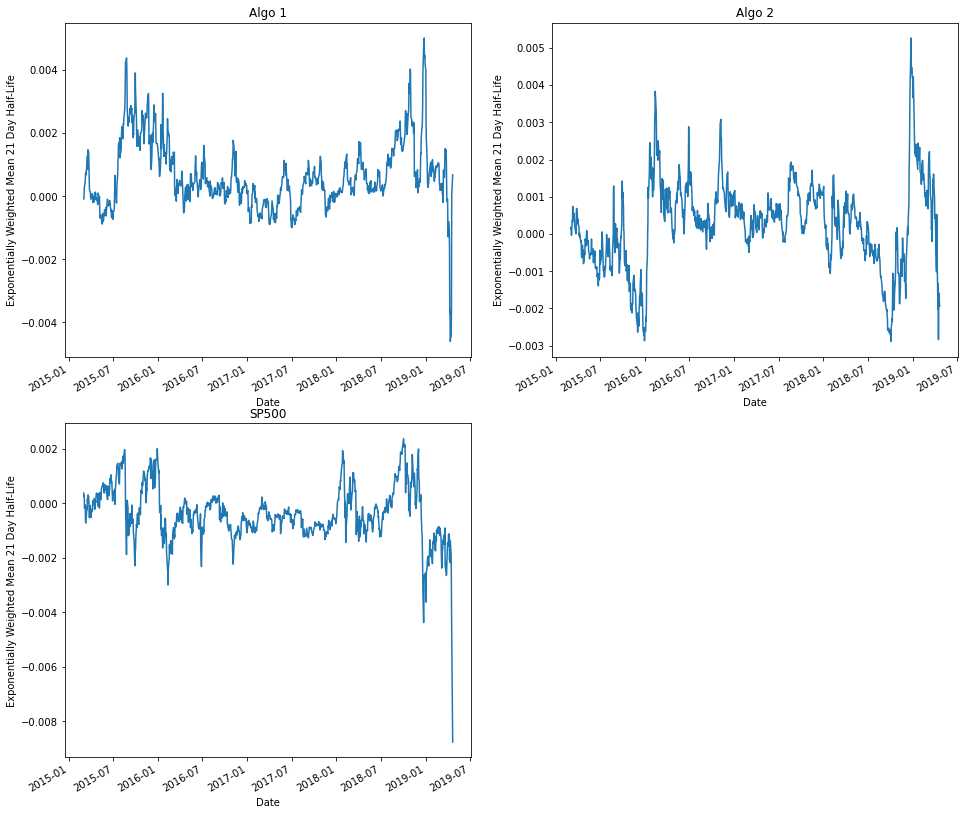

In [80]:
# Use `ewm` to calculate the rolling window
## Try calculating the ewm with a 21-day half-life.

ewm_jnd = jnd_ret.ewm(halflife = 21).mean()

fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
ewm_jnd[ewm_jnd.columns[0]].plot(xlabel="Date", ylabel="Exponentially Weighted Mean 21 Day Half-Life", title=ewm_jnd.columns[0].strip())

fig.add_subplot(2,2,2) 
ewm_jnd[ewm_jnd.columns[1]].plot(xlabel="Date", ylabel="Exponentially Weighted Mean 21 Day Half-Life", title=ewm_jnd.columns[1].strip())

fig.add_subplot(2,2,3) 
ewm_jnd[ewm_jnd.columns[2]].plot(xlabel="Date", ylabel="Exponentially Weighted Mean 21 Day Half-Life", title=ewm_jnd.columns[2].strip())

fig.add_subplot(2,2,4) 
ewm_jnd[ewm_jnd.columns[3]].plot(xlabel="Date", ylabel="Exponentially Weighted Mean 21 Day Half-Life", title=ewm_jnd.columns[3].strip())


fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
ewm_jnd[ewm_jnd.columns[4]].plot(xlabel="Date", ylabel="Exponentially Weighted Mean 21 Day Half-Life", title=ewm_jnd.columns[4].strip())

fig.add_subplot(2,2,2) 
ewm_jnd[ewm_jnd.columns[5]].plot(xlabel="Date", ylabel="Exponentially Weighted Mean 21 Day Half-Life", title=ewm_jnd.columns[5].strip())

fig.add_subplot(2,2,3) 
ewm_jnd[ewm_jnd.columns[6]].plot(xlabel="Date", ylabel="Exponentially Weighted Mean 21 Day Half-Life", title=ewm_jnd.columns[6].strip())




---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [81]:
# Annualized Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (jnd_ret.mean() * 252) / (jnd_ret.std() * np.sqrt(252))
shp = sharpe_ratios


<BarContainer object of 7 artists>

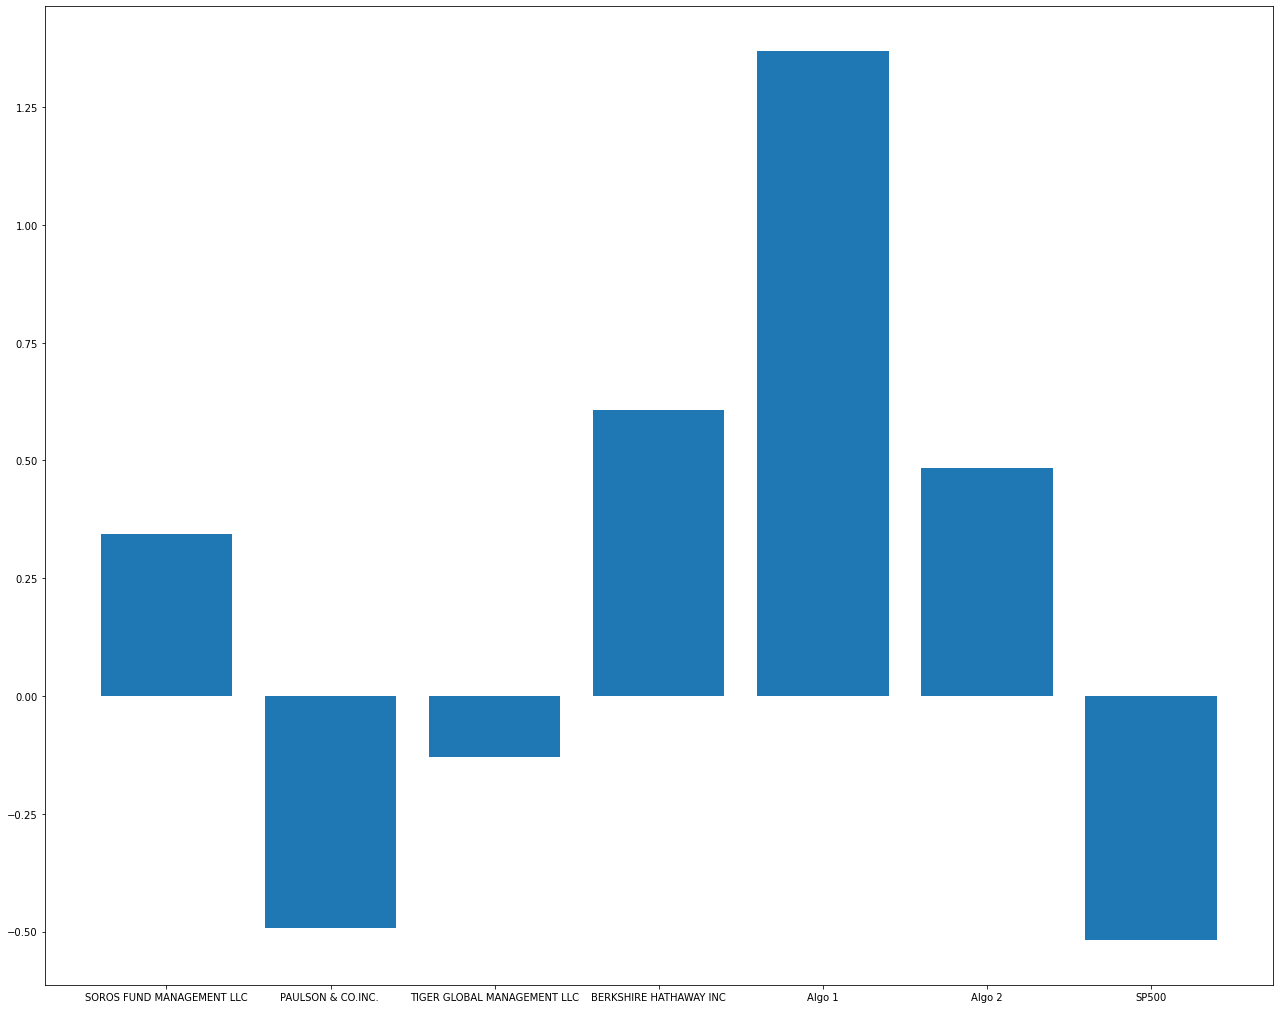

In [82]:
# Visualize the sharpe ratios as a bar plot

fig1, br = plt.subplots(figsize=(22,18))

br.bar(height=shp, x = [shp.index[0], 
                        shp.index[1],
                        shp.index[2],
                        shp.index[3],
                        shp.index[4],
                        shp.index[5],
                        shp.index[6]
                        ])


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on this analysis, algorithmic strategies do outperform both the SP500 and the whales' portfolios.  The Sharpe ratio is higher and the volatility/standard deviation is lower. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [83]:
# Reading data from 1st stock


In [84]:
# Reading data from 2nd stock


In [85]:
# Reading data from 3rd stock


In [86]:
# Combine all stocks in a single DataFrame


In [87]:
# Reset Date index


In [88]:
# Reorganize portfolio data by having a column per symbol


Nulls: Google=Google    0
dtype: int64, NVIDIA=NVIDIA    0
dtype: int64, Cost=Symbol    0
NOCP      0
dtype: int64, Boeing=Boeing    0
dtype: int64


<AxesSubplot:xlabel='Date'>

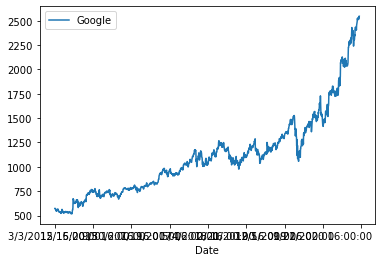

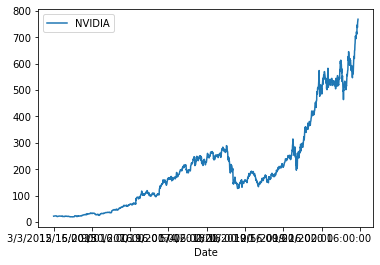

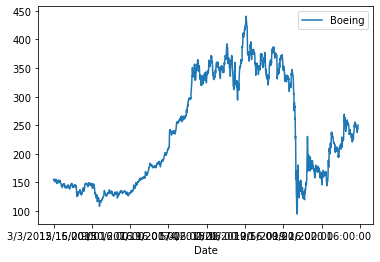

In [89]:
# Calculate daily returns

# Drop NAs

# Display sample data
#%% read in the data 

goog_pth = Path(basedir + "/Resources/Google_6yr.csv")
ndva_pth = Path(basedir + "/Resources/NVIDIA_6yr.csv")
ba_pth = Path(basedir + "/Resources/Boeing_6yr.csv")

go_df = pd.read_csv(goog_pth, index_col=("Date"))
nd_df = pd.read_csv(ndva_pth, index_col=("Date"))
ba_df = pd.read_csv(ba_pth, index_col=("Date"))

go_df = pd.DataFrame(go_df['Close'].rename("Google"))
nd_df = pd.DataFrame(nd_df['Close'].rename("NVIDIA"))
ba_df = pd.DataFrame(ba_df['Close'].rename("Boeing"))

#%% clean thedata 

## Count nulls 
go_nulls = go_df.isnull().sum()
nd_nulls = nd_df.isnull().sum()
ba_nulls = ba_df.isnull().sum()

print(f"Nulls: Google={go_nulls}, NVIDIA={nd_nulls}, Cost={cost_nulls}, Boeing={ba_nulls}")

#%% drop the nulls 

go = go_df.pct_change().dropna() 
nd = nd_df.pct_change().dropna() 
ba = ba_df.pct_change().dropna() 

#%% combine the data 
prt_ret = pd.concat([go, nd, ba], axis="columns", join = "inner")
prt_ret = prt_ret.sort_index(ascending=False)

#%% plot the data
go_df.plot()
nd_df.plot()
ba_df.plot()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

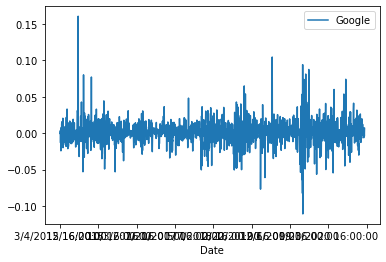

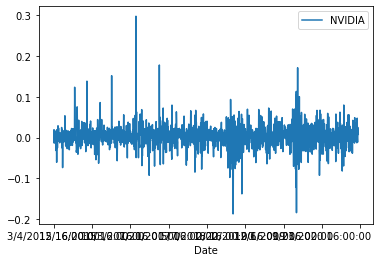

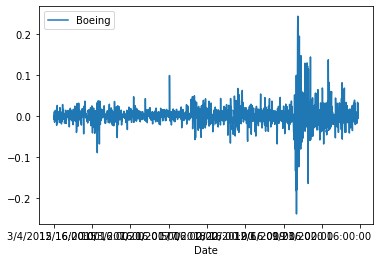

In [90]:
# plot the returns 
#%% plot the returns 
go.plot()
nd.plot() 
ba.plot() 


<AxesSubplot:xlabel='Date'>

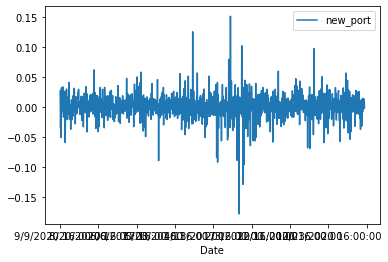

In [91]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
prt_ret_w = prt_ret.dot(weights)

prt_ret_w = pd.DataFrame(prt_ret_w.rename("new_port"))

# Display sample data
prt_ret_w.plot()



## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [105]:
# Join your returns DataFrame to the original returns DataFrame
## normalize the date time index to be aligned with the other portfolio dataframe

## normalize does not work in jupyter lab, but it does work in spyder --
#prt_ret.index = prt_ret.index.normalize()
#prt_ret_w = prt_ret.dot(weights)
#all_ret = pd.concat([jnd_ret, prt_ret_w], axis="columns", join = "inner")

all_ret_pth = Path(basedir + "/Resources/all_ret.csv")
all_ret_df = pd.read_csv(all_ret_pth, index_col=("Date"))
all_ret_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
Date,,,,,,,,
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.002947
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.000498
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.002795
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.013538
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.012101
...,...,...,...,...,...,...,...,...
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.007378
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.005118
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.011860


In [108]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_ret= pd.DataFrame(all_ret_df)

all_ret

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
Date,,,,,,,,
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.002947
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.000498
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.002795
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.013538
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.012101
...,...,...,...,...,...,...,...,...
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.007378
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.005118
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.011860


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [109]:
# Calculate the annualized `std`
all_ret_std = all_ret.std().sort_values()*np.sqrt(252)
all_ret_std

PAULSON & CO.INC.              0.111556
Algo 1                         0.121058
SOROS FUND MANAGEMENT LLC      0.125406
Algo 2                         0.132475
SP500                          0.136359
TIGER GLOBAL MANAGEMENT LLC    0.173072
BERKSHIRE HATHAWAY INC         0.205148
0                              0.239221
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Weighted Portfolio'}, xlabel='Date', ylabel='Roling Standard Deviation -- 21 Days'>

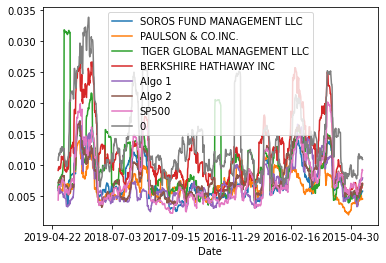

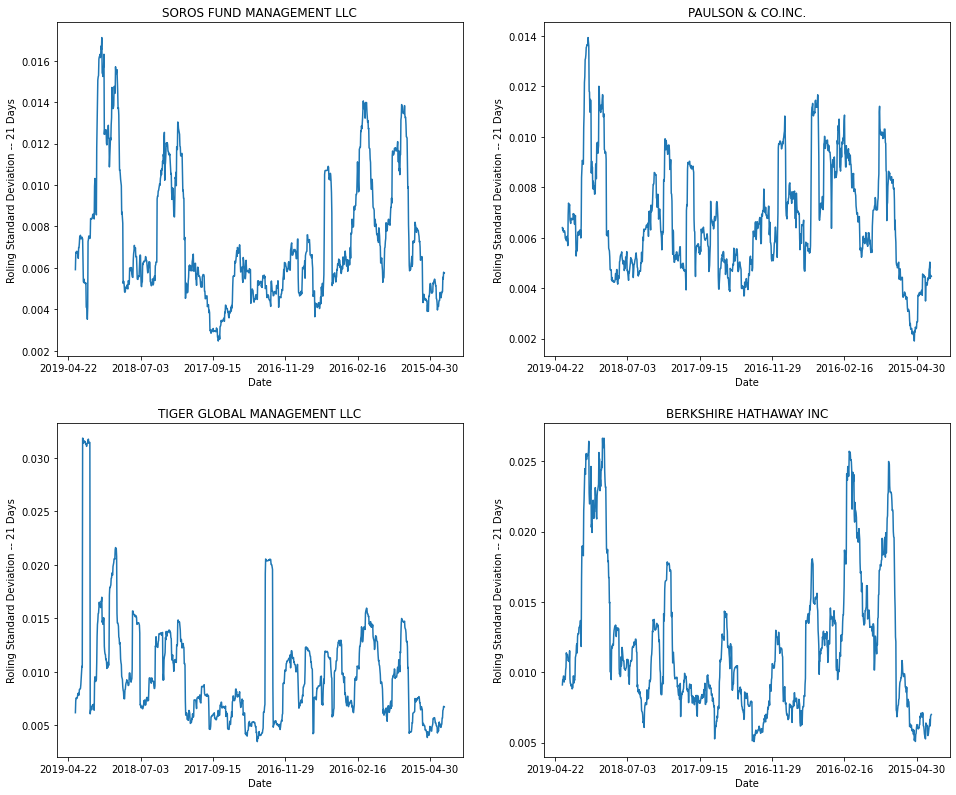

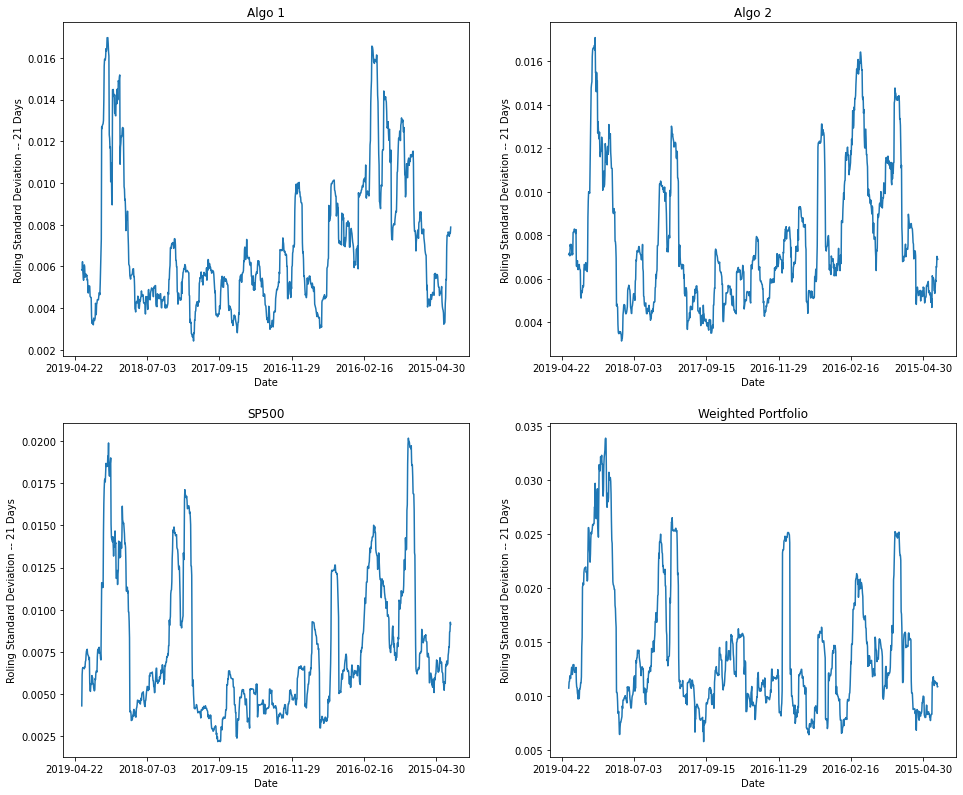

In [112]:
# Calculate rolling standard deviation
all_ret_roll_std = all_ret.rolling(window=21).std()

# Plot rolling standard deviation
all_ret_roll_std.plot()



fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
all_ret_roll_std[all_ret_roll_std.columns[0]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=all_ret_roll_std.columns[0].strip())

fig.add_subplot(2,2,2) 
all_ret_roll_std[all_ret_roll_std.columns[1]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=all_ret_roll_std.columns[1].strip())

fig.add_subplot(2,2,3) 
all_ret_roll_std[all_ret_roll_std.columns[2]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=all_ret_roll_std.columns[2].strip())

fig.add_subplot(2,2,4) 
all_ret_roll_std[all_ret_roll_std.columns[3]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=all_ret_roll_std.columns[3].strip())


fig = plt.figure(figsize=[16,15])   ## create a figure 

fig.autofmt_xdate(rotation=90) 
fig.add_subplot(2,2,1)
all_ret_roll_std[all_ret_roll_std.columns[4]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=all_ret_roll_std.columns[4].strip())

fig.add_subplot(2,2,2) 
all_ret_roll_std[all_ret_roll_std.columns[5]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=all_ret_roll_std.columns[5].strip())

fig.add_subplot(2,2,3) 
all_ret_roll_std[all_ret_roll_std.columns[6]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title=all_ret_roll_std.columns[6].strip())

fig.add_subplot(2,2,4) 
all_ret_roll_std[all_ret_roll_std.columns[7]].plot(xlabel="Date", ylabel="Roling Standard Deviation -- 21 Days", title="Weighted Portfolio")





### Calculate and plot the correlation

<AxesSubplot:>

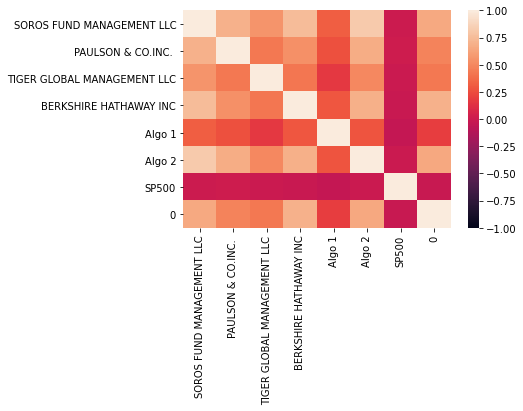

In [113]:
# Calculate and plot the correlation

# Calculate the correlation
corr_all_ret = all_ret.corr()

#%% plot the correlation matrix

sns.heatmap(corr_all_ret, vmin=-1, vmax =1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

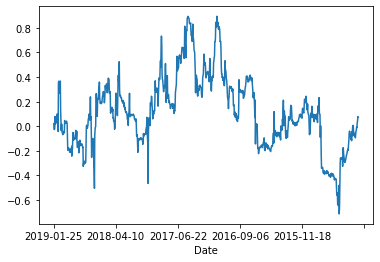

In [115]:
#%% Calculate and plot the beta

# Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

wgt = all_ret.iloc[:,7]


wgt_roll_cov = all_ret.iloc[:,7].rolling(window=60).cov(all_ret['SP500']).dropna()
sp_roll_var = all_ret['SP500'].rolling(window=60).var().dropna()

beta_wgt = wgt_roll_cov / sp_roll_var

beta_wgt.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [116]:
# Calculate Annualzied Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (all_ret.mean() * 252) / (all_ret.std() * np.sqrt(252))


<BarContainer object of 8 artists>

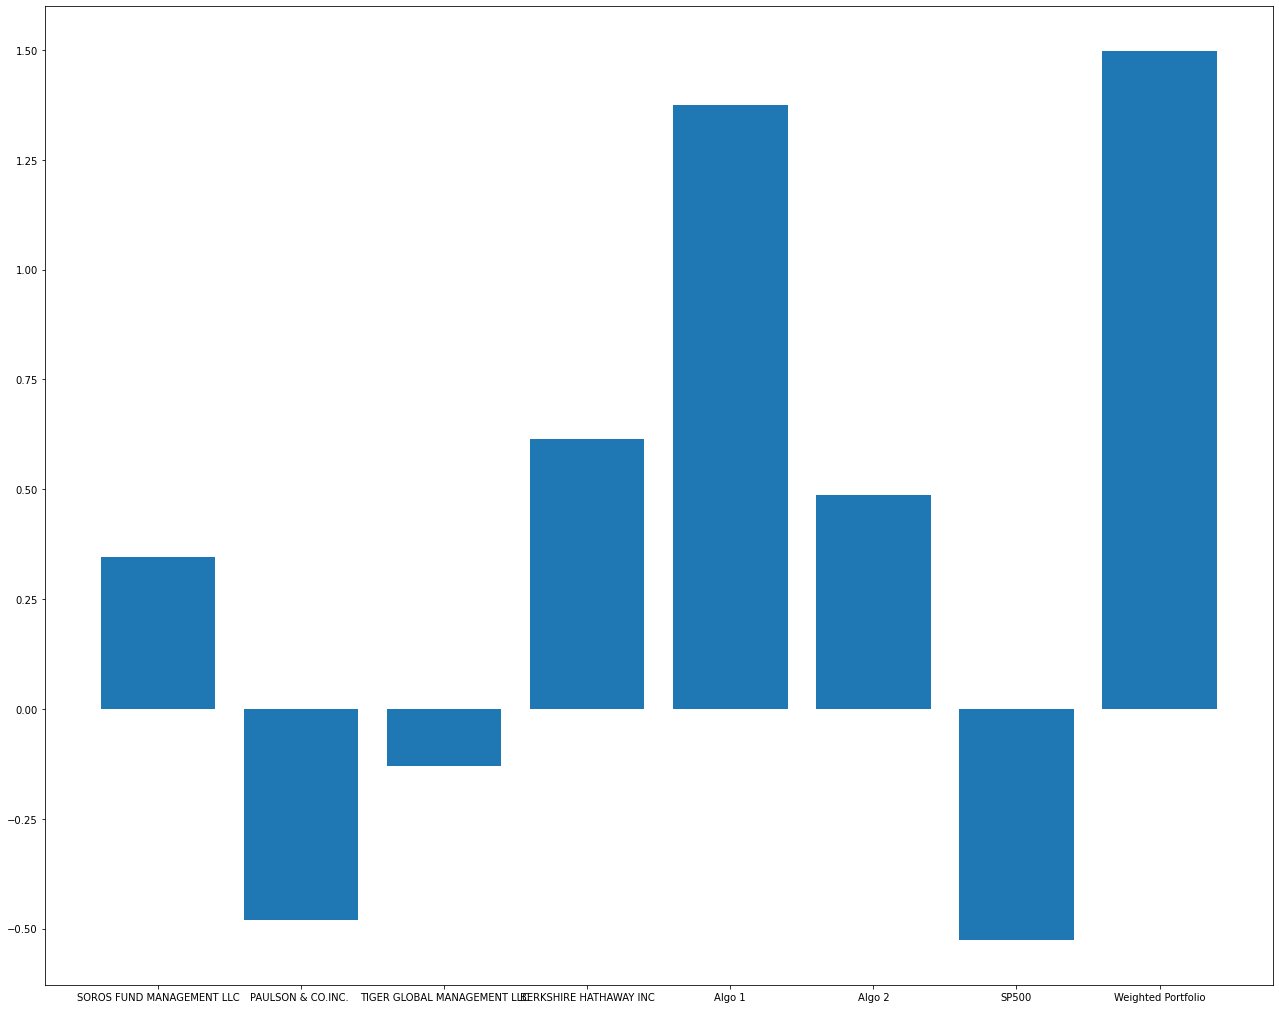

In [117]:
# Visualize the sharpe ratios as a bar plot
fig1, br = plt.subplots(figsize=(22,18))

br.bar(height=sharpe_ratios, x = [sharpe_ratios.index[0], 
                        sharpe_ratios.index[1],
                        sharpe_ratios.index[2],
                        sharpe_ratios.index[3],
                        sharpe_ratios.index[4],
                        sharpe_ratios.index[5],
                        sharpe_ratios.index[6],
                        "Weighted Portfolio",
                        ])

### How does your portfolio do?

Write your answer here!

In [ ]:
The custom portfolio has higher volatility, a negative beta, and a large sharpe ratio.  A large sharpe ratio means that high degree of expected
return for a relatively low amount of risk.

This means that the custom porfolio is expected to perform relatively better than the other porfolios given an acceptabel risk profile. 
